In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pandas as pd

%matplotlib notebook

In [2]:
coord = pd.read_csv('../preprocesses/section_data/net_coord.csv')
coord
   

,NodeID,CoordX,CoordY,TagText,TagProperties,TagDeltaX,TagDeltaY,TagAngle,TagAlignment,TagBorder,...,MaximumLoadShed,ShedLoadCost,UserDefinedBaseVoltage,RatedVoltage,RatedCurrent,ANSISymCurrent,ANSIAsymCurrent,PeakCurrent,Standard,Installation
0,201827771,912872.500000,450983.331000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42784779-SPOTLOAD,553936.808426,146115.680388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42933083,888887.500000,326986.330950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52894498,804812.500000,578983.330950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42805981,554167.347000,145823.926000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,42875178,819443.716072,539095.272274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,52061191,824993.716072,311092.272274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,42762171-SPOTLOAD,554234.887258,145830.116397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,42773422,554224.880000,146486.816000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,42774787-SPOTLOAD,554004.786862,145857.488915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
del_coordX = coord[coord["CoordX"] >= 555000]

del_coord = del_coordX[del_coordX["CoordY"] >= 150000]

del_coord = pd.DataFrame(del_coord["NodeID"].reset_index(drop=True))
del_coord['NodeID'] = del_coord['NodeID'].astype(str)

#del_coord = del_coord.drop('Index', axis=1)

with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
    print(del_coordX)

                  NodeID         CoordX         CoordY  TagText      ...       \
0              201827771  912872.500000  450983.331000      NaN      ...        
2               42933083  888887.500000  326986.330950      NaN      ...        
3               52894498  804812.500000  578983.330950      NaN      ...        
5               42875178  819443.716072  539095.272274      NaN      ...        
6               52061191  824993.716072  311092.272274      NaN      ...        
12              42891158  823233.716072  579095.272274      NaN      ...        
16              42902616  856857.500000  624986.330950      NaN      ...        
17             214656182  887376.216000  639128.813000      NaN      ...        
19              42895116  821158.716072  355128.812524      NaN      ...        
20              42940860  887338.716000  639095.272000      NaN      ...        
21              42952609  899233.716072  375095.272274      NaN      ...        
22              42967485  81

In [4]:
section = pd.read_csv('../preprocesses/section_data/pf_subsection_Gutenberg.csv')

section 

,SectionID,FromNodeID,FromNodeIndex,ToNodeID,ToNodeIndex,Phase,ZoneID,SubNetworkId,EnvironmentID
0,42575388,42879302,0,52114128,0,ABC,NaN,BYRONNE - VV - 5890 (43394265),0
1,42549833,42876388,0,52114148,0,ABC,NaN,BYRONNE - VV - 5890 (43394265),0
2,42613833,42951835,0,42951834,0,ABC,NaN,TILLEULS - VV - 5890 (43397027),0
3,42535653,42968944,0,42876386,0,ABC,NaN,BYRONNE - VV - 5890 (43394265),0
4,52114130,42879301,0,52114128,0,ABC,NaN,BYRONNE - VV - 5890 (43394265),0
5,52114150,42876386,0,52114148,0,ABC,NaN,BYRONNE - VV - 5890 (43394265),0
6,52114140,42876385,0,52114138,0,ABC,NaN,BYRONNE - VV - 5890 (43394265),0
7,42575208,42945679,0,42881432,0,ABC,NaN,BYRONNE - VV - 5890 (43394265),0
8,184842391,192652303,0,42965808,0,ABC,NaN,STEINLEN - VV - 5890 (43394065),0
9,184842365,184842069,0,192649077,0,ABC,NaN,STEINLEN - VV - 5890 (43394065),0


In [5]:
a = del_coord['NodeID']
section['FromNodeID'] = section['FromNodeID'].astype(str)
section['ToNodeID'] = section['ToNodeID'].astype(str)

section_2 = section[~section['FromNodeID'].isin(del_coord['NodeID'])]

section_3 = section_2[~section_2['ToNodeID'].isin(del_coord['NodeID'])]

section_3 = section_3.reset_index(drop=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
    print(section_3)

  SectionID FromNodeID  FromNodeIndex  ToNodeID      ...       Phase ZoneID  \
0  44009368   42826833              0  42858362      ...         ABC    NaN   
1  44000334  137006430              0  42826835      ...         ABC    NaN   
2  43959870   42706732              0  42858363      ...         ABC    NaN   

   SubNetworkId EnvironmentID  
0           NaN             0  
1           NaN             0  
2           NaN             0  

[3 rows x 9 columns]


In [6]:
in_coord = coord[~coord['NodeID'].isin(del_coord['NodeID'])]

with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
    print(in_coord.reset_index(drop=True))

                                 NodeID         CoordX         CoordY  \
0                     42784779-SPOTLOAD  553936.808426  146115.680388   
1                              42805981  554167.347000  145823.926000   
2                     42762171-SPOTLOAD  554234.887258  145830.116397   
3                              42773422  554224.880000  146486.816000   
4                     42774787-SPOTLOAD  554004.786862  145857.488915   
5                              42800598  554172.665000  145749.726000   
6                              42826835  554213.574000  146132.659000   
7                              42684822  554202.296000  145812.842000   
8                              42692306  553907.670000  146018.676000   
9                              42793458  554020.032000  145979.088000   
10                             42677448  553987.234000  146063.703000   
11                            160381938  553708.694000  145882.643000   
12                             42689099  554258.868

In [7]:
DG = nx.DiGraph()

In [8]:
pos = {}
pos = {row["NodeID"]: (row["CoordX"],row["CoordY"]) for _,row in in_coord.iterrows()}


DG.add_nodes_from(pos.keys())

nx.set_node_attributes(DG, pos, 'coordinates')


#nodes_to_print = list(DG.nodes(data=True))
#nodes_to_print[20]

pos


{'42784779-SPOTLOAD': (553936.8084260001, 146115.680388),
 '42805981': (554167.347, 145823.926),
 '42762171-SPOTLOAD': (554234.887258, 145830.116397),
 '42773422': (554224.88, 146486.816),
 '42774787-SPOTLOAD': (554004.786862, 145857.48891500002),
 '42800598': (554172.665, 145749.726),
 '42826835': (554213.574, 146132.659),
 '42684822': (554202.296, 145812.842),
 '42692306': (553907.67, 146018.676),
 '42793458': (554020.032, 145979.088),
 '42677448': (553987.234, 146063.703),
 '160381938': (553708.694, 145882.643),
 '42689099': (554258.868, 145618.281),
 '42767560-SPOTLOAD': (554302.9773390001, 145494.675102),
 '42687144': (553946.222, 145527.035),
 '42784354': (553664.146, 146132.735),
 '42688342': (553765.084, 146171.445),
 '42774597': (553729.649, 145983.831),
 '42832294': (554286.091, 145848.206),
 '42772657': (553754.633, 146007.656),
 '42789009': (554341.727, 145552.635),
 '42791070-SPOTLOAD': (554178.076879, 145785.146028),
 '42766857-SPOTLOAD': (554019.645741, 146457.0023680000

In [9]:
#for i,v in pos.items():
#    if v > 560000:
#        del pos[i]
#pos

#pos_2 = {k:v for k,v in pos.items() if v < 150000}

#pos_2

In [10]:
lines = [(str(row["FromNodeID"]), row["ToNodeID"]) for _, row in section_3.iterrows()]
DG.add_edges_from(lines)

In [11]:
aaa_nodes = list(section_3.FromNodeID.unique())
aaa_nodes += list(section_3.ToNodeID.unique())

bbb_nodes = []
for (node_in, node_out) in lines:
    bbb_nodes.append(node_in)
    bbb_nodes.append(node_out)

print(len(set(aaa_nodes)))
print(len(set(bbb_nodes)))

6
6


In [12]:
list(DG.nodes)

['42784779-SPOTLOAD',
 '42805981',
 '42762171-SPOTLOAD',
 '42773422',
 '42774787-SPOTLOAD',
 '42800598',
 '42826835',
 '42684822',
 '42692306',
 '42793458',
 '42677448',
 '160381938',
 '42689099',
 '42767560-SPOTLOAD',
 '42687144',
 '42784354',
 '42688342',
 '42774597',
 '42832294',
 '42772657',
 '42789009',
 '42791070-SPOTLOAD',
 '42766857-SPOTLOAD',
 '42770529',
 '42679006',
 '42765005',
 '42769631-SPOTLOAD',
 '42683455',
 '42678666',
 '42770999-SPOTLOAD',
 '42689059',
 '42758557',
 '42759255-SPOTLOAD',
 '42681953',
 '42684673',
 '42793708',
 '42781025',
 '42700438',
 '42718174',
 '42817313',
 '42791308',
 '210781646',
 '42772127',
 '137939855',
 '42681395',
 '42766495',
 '42782565',
 '42788149',
 '42669859',
 '42763745-SPOTLOAD',
 '42781803',
 '42678156',
 '42678176',
 '42717213',
 '42778548-SPOTLOAD',
 '42768460-SPOTLOAD',
 '42850992',
 '42673347',
 '42777658',
 '148905331-SPOTLOAD',
 '42669373',
 '42702056',
 '42681873',
 '137009437',
 '42683854',
 '42709231',
 '42770948',
 '42668

In [13]:
list(DG.edges)

[('42706732', '42858363'), ('137006430', '42826835'), ('42826833', '42858362')]

In [14]:
DG.number_of_nodes()

1820

In [15]:
DG.number_of_edges()

3

<IPython.core.display.Javascript object>


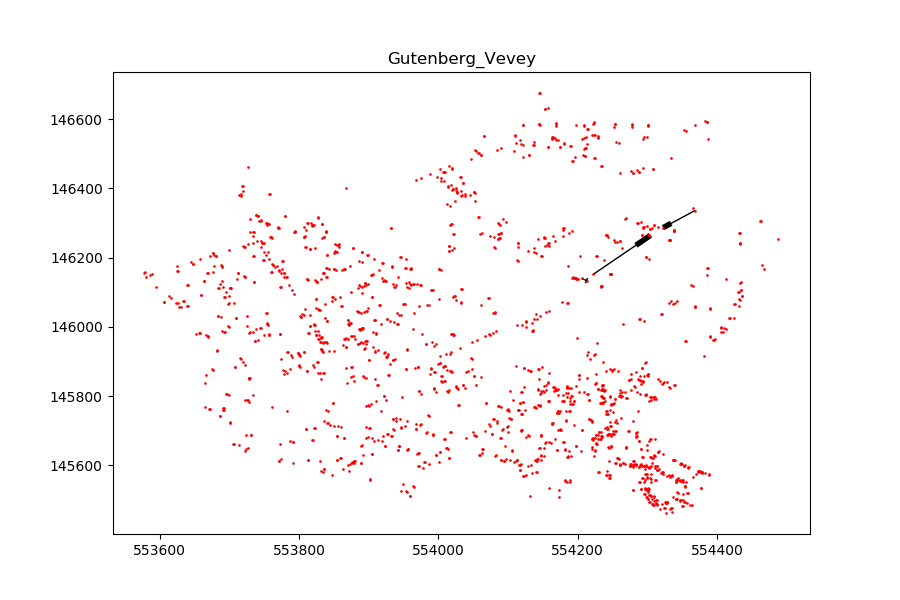

In [16]:
#nx.draw(DG,pos,with_labels=False, arrows=True)
plt.figure(1, figsize=(9.0, 6.0))

nx.draw_networkx(DG, pos, with_labels=False,node_size=0.8)
plt.title('Gutenberg_Vevey')
#plt.ylim((145400, 146800))
#plt.xlim((553500, 554500))
plt.show()

<IPython.core.display.Javascript object>


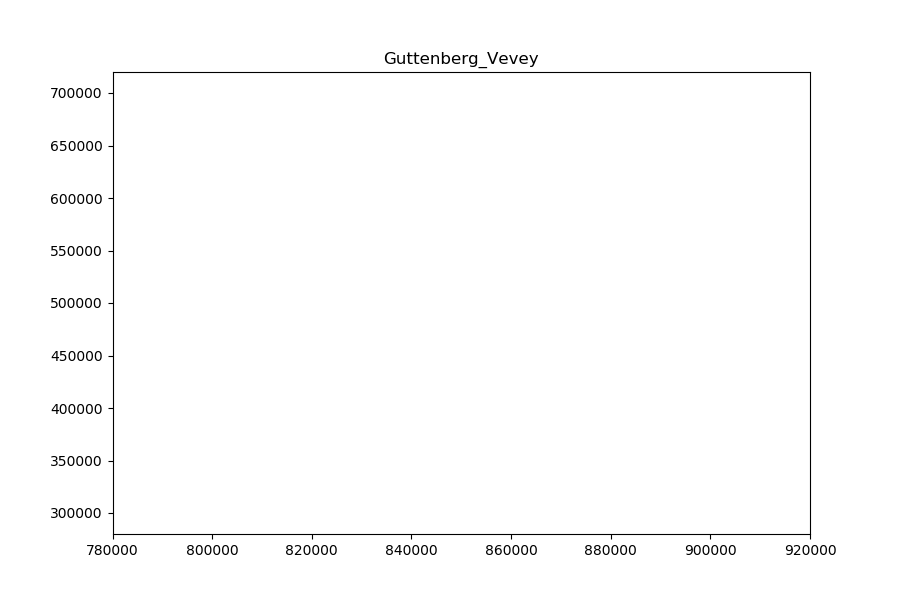

In [17]:
#nx.draw(DG,pos,with_labels=False, arrows=True)
plt.figure(2, figsize=(9.0, 6.0))

nx.draw_networkx(DG,pos, with_labels=False)
plt.title('Guttenberg_Vevey')
plt.ylim((280000, 720000))
plt.xlim((780000, 920000))
plt.show()